In [2]:
import pandas as pd
from pathlib import Path
from one.remote import aws
from one.api import ONE

In [3]:
LOCAL_DATA_PATH = Path("/moto/stats/users/hy2562/projects/ephys atlas")


In [4]:
ONE.setup(base_url='https://alyx.internationalbrainlab.org', make_default=True)

Param ALYX_LOGIN, current value is ["han.yu"]: 
Param HTTP_DATA_SERVER, current value is ["https://ibl.flatironinstitute.org/public"]: 
Param HTTP_DATA_SERVER_LOGIN, current value is ["None"]: 
Enter the FlatIron HTTP password for None (leave empty to keep current):  ········
Enter the location of the download cache, current value is ["/moto/home/hy2562/Downloads/ONE/alyx.internationalbrainlab.org"]: 
Are the above settings correct? [Y/n] y


ONE Parameter files location: /moto/home/hy2562/.one


IBLParams(CLIENT_MAP={'alyx.internationalbrainlab.org': '/moto/home/hy2562/Downloads/ONE/alyx.internationalbrainlab.org', 'test.alyx.internationalbrainlab.org': '/moto/home/hy2562/Downloads/ONE/test.alyx.internationalbrainlab.org'}, DEFAULT='alyx.internationalbrainlab.org')

In [7]:
sessions = one.alyx.rest('sessions', 'list', tag='2022_Q2_IBL_et_al_RepeatedSite')

In [14]:
eids, info = one.search(date_range=['2020-08-01', '2020-08-31'], dataset='probes.description', details=True)


/moto/stats/users/hy2562/mambaforge/envs/a/lib/python3.10/site-packages/one/api.py:472: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  datasets = datasets.loc[(sessions.index.values, ), :]


In [15]:
eID = eids[0]

In [16]:
one = ONE(base_url="https://alyx.internationalbrainlab.org")

st = one.load_dataset(eID, 'spikes.times', collection = "alf/probe01") 

/moto/home/hy2562/Downloads/ONE/alyx.internationalbrainlab.org/mrsicflogellab/Subjects/SWC_045/2020-08-28/001/al


In [19]:
sc = one.load_dataset(eID, 'spikes.clusters', collection = "alf/probe01") 

/moto/home/hy2562/Downloads/ONE/alyx.internationalbrainlab.org/mrsicflogellab/Subjects/SWC_045/2020-08-28/001/al


In [ ]:
wf = one.load_dataset(eID, 'spikes.clusters', collection = "alf/probe01") 

In [18]:
import numpy as np
np.shape(st)

(9895411,)

In [21]:
np.unique(sc)

array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  12,  13,  14,  15,
        16,  17,  19,  21,  22,  23,  24,  25,  26,  27,  29,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  59,  61,
        63,  65,  66,  67,  68,  69,  70,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 118, 119,
       122, 123, 124, 125, 126, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 20

In [22]:
np.shape(np.where(sc==0))

(1, 96316)

In [24]:
np.shape(np.where(sc==2))

(1, 49355)

In [5]:
# The AWS private credentials are stored in Alyx, so that only one authentication is required
one = ONE(base_url="https://alyx.internationalbrainlab.org", mode='online')
s3, bucket_name = aws.get_s3_from_alyx(alyx=one.alyx)
aws.s3_download_folder("aggregates/bwm",
                       LOCAL_DATA_PATH,
                       s3=s3, bucket_name=bucket_name)


Enter Alyx password for "han.yu": ········


Connected to https://alyx.internationalbrainlab.org as user "han.yu"
Downloading: /moto/home/hy2562/Downloads/ONE/alyx.internationalbrainlab.org/tmprflpw9ug/cache.zip Bytes: 91949337


100%|█████████████████████████████████████████████| 87.68972110748291/87.68972110748291 [00:03<00:00, 23.79it/s]
/moto/stats/users/hy2562/projects/ephys atlas/latest/channels.pqt: 100%|███| 1.91M/1.91M [00:00<00:00, 10.6MB/s]
/moto/stats/users/hy2562/projects/ephys atlas/latest/clusters.pqt: 100%|███| 32.4M/32.4M [00:00<00:00, 52.5MB/s]
/moto/stats/users/hy2562/projects/ephys atlas/latest/depths.pqt: 100%|█████| 3.27M/3.27M [00:00<00:00, 14.5MB/s]
/moto/stats/users/hy2562/projects/ephys atlas/latest/df_save_goodunit_ins_region.csv: 100%|█| 3.88k/3.88k [00:00
/moto/stats/users/hy2562/projects/ephys atlas/latest/probes.pqt: 100%|██████| 41.4k/41.4k [00:00<00:00, 692kB/s]
/moto/stats/users/hy2562/projects/ephys atlas/latest/raw_ephys_features.pqt: 100%|█| 23.9M/23.9M [00:00<00:00, 5
/moto/stats/users/hy2562/projects/ephys atlas/latest/xyz_picks.pqt: 100%|████| 311k/311k [00:00<00:00, 2.90MB/s]


[PosixPath('/moto/stats/users/hy2562/projects/ephys atlas/2022_W34/channels.pqt'),
 PosixPath('/moto/stats/users/hy2562/projects/ephys atlas/2022_W34/clusters.pqt'),
 PosixPath('/moto/stats/users/hy2562/projects/ephys atlas/2022_W34/depths.pqt'),
 PosixPath('/moto/stats/users/hy2562/projects/ephys atlas/2022_W34/probes.pqt'),
 PosixPath('/moto/stats/users/hy2562/projects/ephys atlas/2022_W34/raw_ephys_features.pqt'),
 PosixPath('/moto/stats/users/hy2562/projects/ephys atlas/2022_W39/channels.pqt'),
 PosixPath('/moto/stats/users/hy2562/projects/ephys atlas/2022_W39/clusters.pqt'),
 PosixPath('/moto/stats/users/hy2562/projects/ephys atlas/2022_W39/depths.pqt'),
 PosixPath('/moto/stats/users/hy2562/projects/ephys atlas/2022_W39/probes.pqt'),
 PosixPath('/moto/stats/users/hy2562/projects/ephys atlas/2022_W39_test/channels.pqt'),
 PosixPath('/moto/stats/users/hy2562/projects/ephys atlas/2022_W39_test/clusters.pqt'),
 PosixPath('/moto/stats/users/hy2562/projects/ephys atlas/2022_W39_test/dep

<Axes: xlabel='label', ylabel='count'>

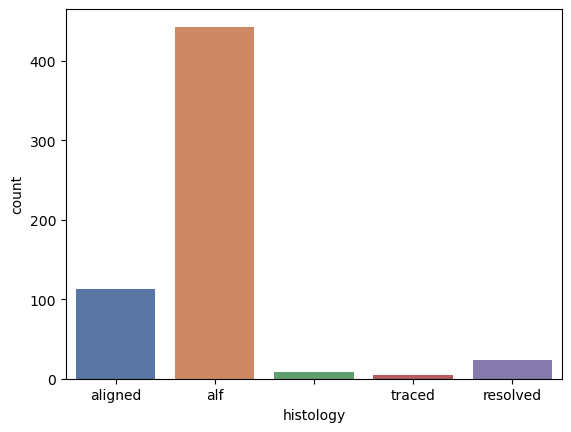

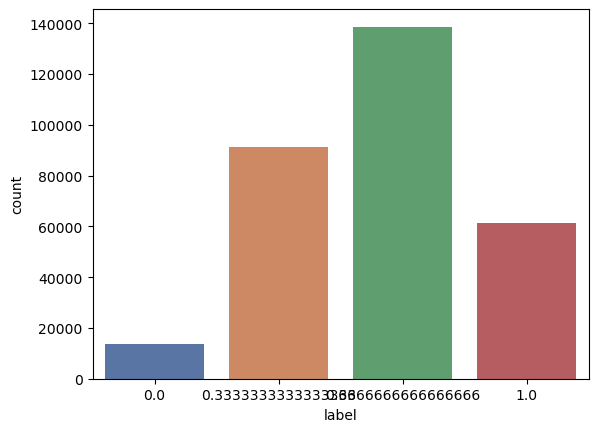

In [13]:
df_clusters = pd.read_parquet(LOCAL_DATA_PATH.joinpath('clusters.pqt'))
df_probes = pd.read_parquet(LOCAL_DATA_PATH.joinpath('probes.pqt'))
df_channels = pd.read_parquet(LOCAL_DATA_PATH.joinpath('channels.pqt'))
df_depths = pd.read_parquet(LOCAL_DATA_PATH.joinpath('depths.pqt'))
df_voltage = pd.read_parquet(LOCAL_DATA_PATH.joinpath('raw_ephys_features.pqt'))

## %%
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.countplot(data=df_probes, x='histology', palette='deep')

plt.figure()
sns.countplot(data=df_clusters, x='label',  palette='deep')


In [56]:
df_voltage.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 226944 entries, ('f336f6a4-f693-4b88-b12c-c5cf0785b061', 0) to ('17f738d1-b16d-4cd3-8c52-77b08ad2e37f', 383)
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   rms_lf       226944 non-null  float32
 1   psd_delta    226944 non-null  float64
 2   psd_theta    226944 non-null  float64
 3   psd_alpha    226944 non-null  float64
 4   psd_beta     226944 non-null  float64
 5   psd_gamma    226944 non-null  float64
 6   rms_ap       226944 non-null  float32
 7   alpha_mean   215465 non-null  float64
 8   alpha_std    208654 non-null  float64
 9   spike_rate   215465 non-null  float64
 10  cloud_x_std  208654 non-null  float64
 11  cloud_y_std  208654 non-null  float64
 12  cloud_z_std  208654 non-null  float64
dtypes: float32(2), float64(11)
memory usage: 21.7+ MB


In [23]:
df_clusters.columns

Index(['channels', 'depths', 'cluster_id', 'amp_max', 'amp_min', 'amp_median',
       'amp_std_dB', 'contamination', 'contamination_alt', 'drift',
       'missed_spikes_est', 'noise_cutoff', 'presence_ratio',
       'presence_ratio_std', 'slidingRP_viol', 'spike_count', 'firing_rate',
       'label', 'ks2_label', 'x', 'y', 'z', 'acronym', 'atlas_id', 'axial_um',
       'lateral_um', 'pid'],
      dtype='object')

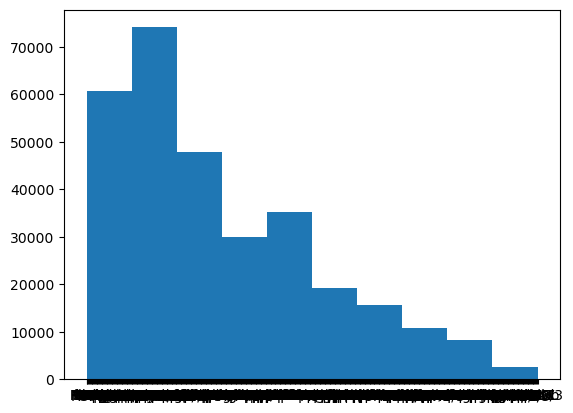

In [ ]:
plt.hist(df_clusters['acronym']);

In [47]:
reg = df_clusters['acronym'].value_counts().index.to_numpy()

In [48]:
count = df_clusters['acronym'].value_counts().to_numpy()

In [53]:
count

array([17587, 12447,  7339,  6048,  5774,  5730,  5596,  5260,  5079,
        4806,  3868,  3770,  3524,  3503,  3230,  3206,  3026,  2979,
        2903,  2803,  2794,  2698,  2565,  2515,  2513,  2327,  2204,
        2196,  2160,  2092,  2058,  2046,  2008,  1974,  1931,  1881,
        1832,  1815,  1795,  1697,  1649,  1634,  1610,  1604,  1544,
        1514,  1498,  1479,  1451,  1440,  1425,  1405,  1328,  1307,
        1302,  1287,  1262,  1231,  1227,  1209,  1155,  1138,  1109,
        1105,  1074,  1074,  1069,  1068,  1057,  1018,  1018,  1017,
         992,   988,   982,   960,   955,   946,   929,   912,   906,
         878,   876,   873,   858,   857,   854,   852,   848,   841,
         833,   832,   825,   820,   814,   808,   798,   797,   783,
         783,   778,   771,   766,   752,   747,   746,   737,   734,
         726,   714,   699,   690,   680,   674,   674,   659,   652,
         646,   642,   641,   640,   629,   625,   625,   624,   621,
         620,   616,

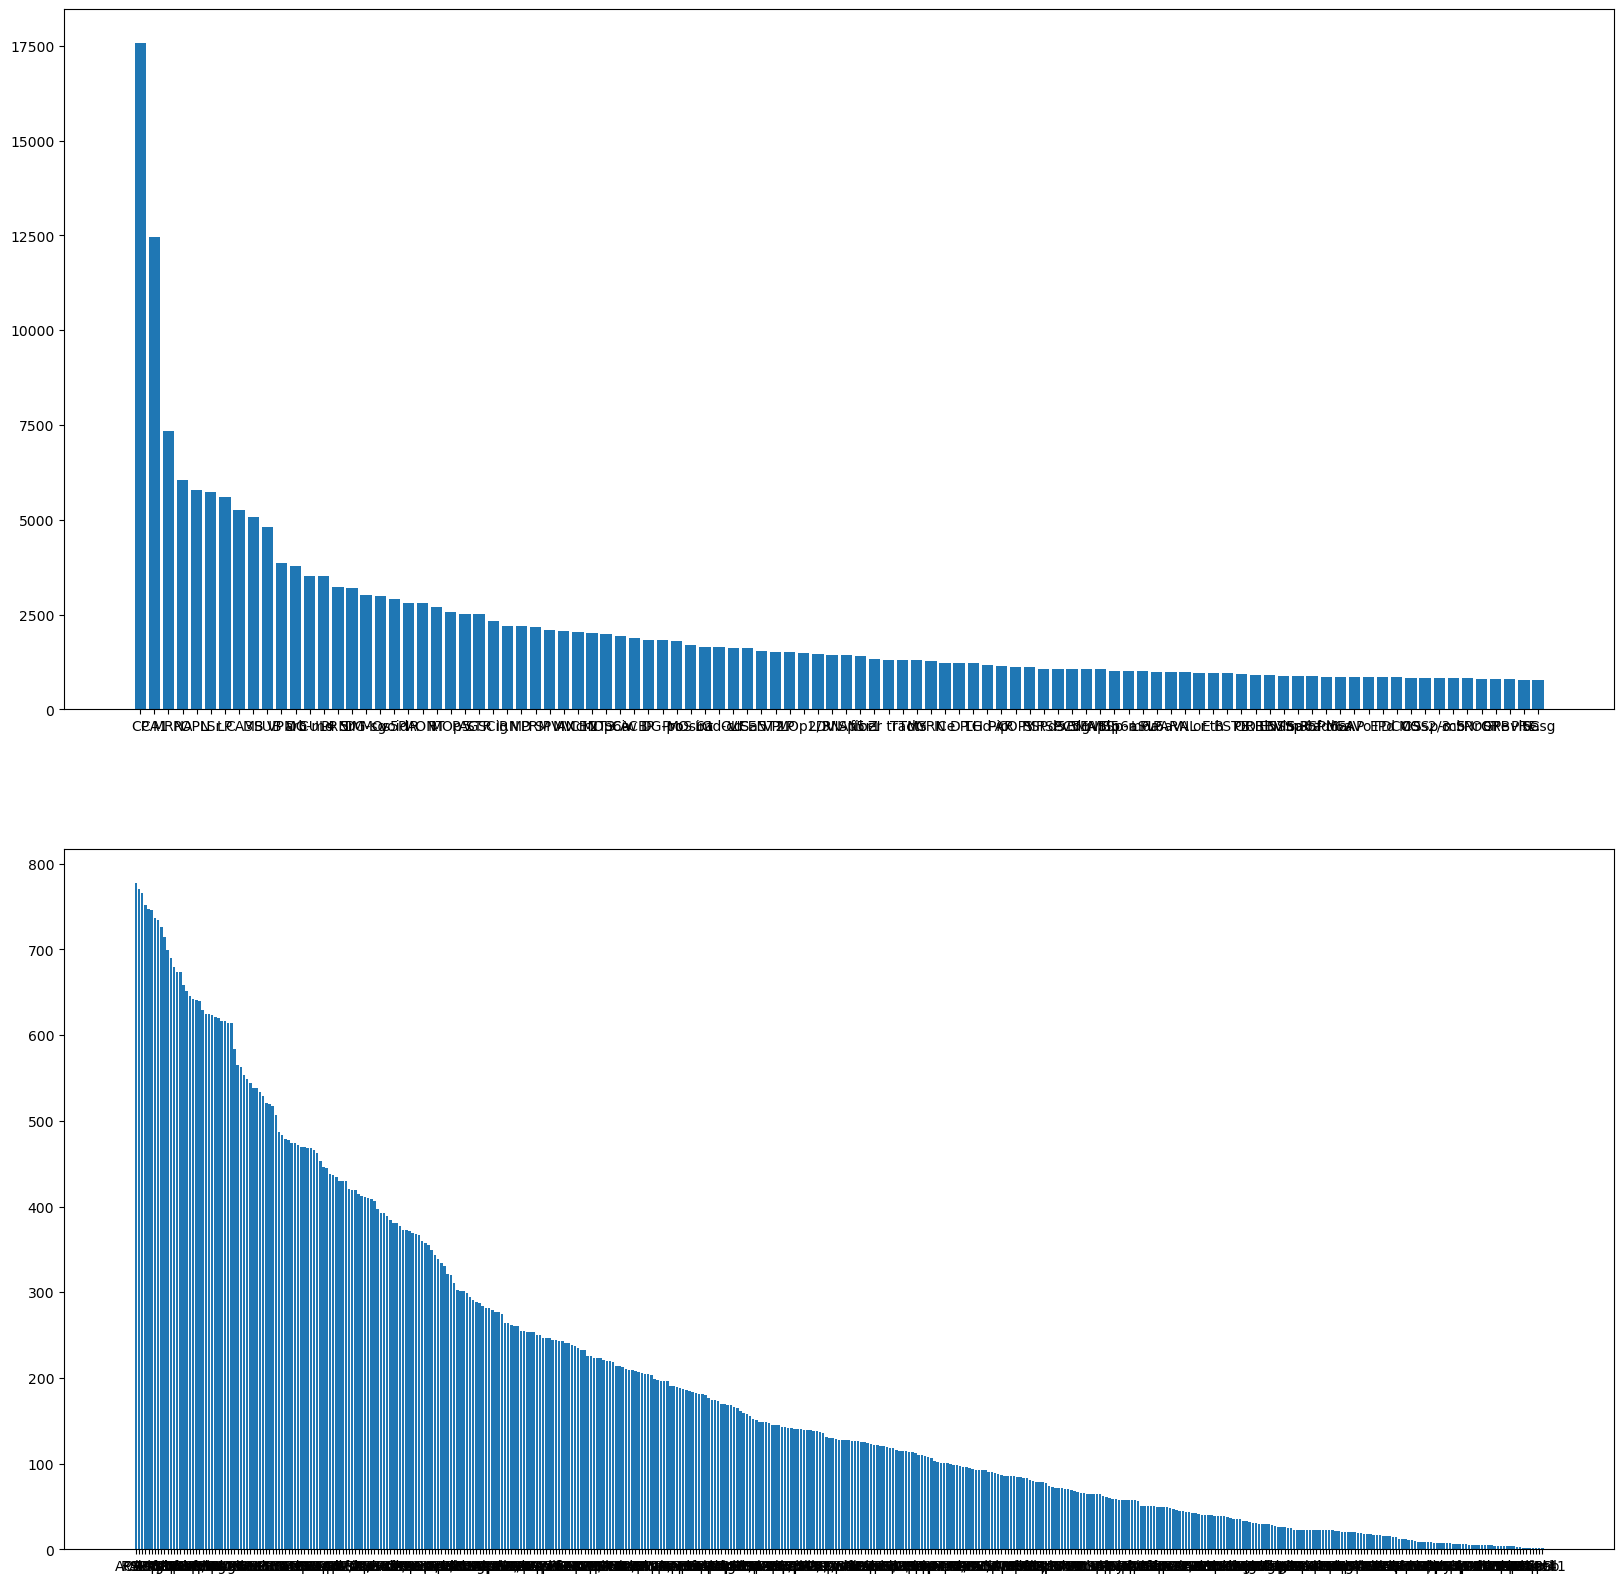

In [54]:
fig, ax = plt.subplots(2,1, figsize = (20,20))
ax[0].bar(reg[0:100], count[0:100]);
ax[1].bar(reg[100:], count[100:]);

In [37]:
import numpy as np
len(np.unique(df_clusters['acronym']))

543

In [26]:
df_clusters

,channels,depths,cluster_id,amp_max,amp_min,amp_median,amp_std_dB,contamination,contamination_alt,drift,...,label,ks2_label,x,y,z,acronym,atlas_id,axial_um,lateral_um,pid
0,4,60.0,0,0.000189,0.000081,0.000087,0.810410,2.830429,1.204866,83355.825544,...,0.333333,mua,0.000868,-0.004074,-0.004771,PRNr,146,60.0,43.0,00b05238-aa75-4846-a480-c5ffef4529dc
1,14,160.0,1,0.000154,0.000069,0.000073,0.782208,3.350876,1.337417,26919.325458,...,0.333333,mua,0.000880,-0.004074,-0.004675,PRNr,146,160.0,59.0,00b05238-aa75-4846-a480-c5ffef4529dc
2,17,180.0,2,0.000249,0.000117,0.000126,0.771212,0.383982,0.279700,140802.056479,...,0.666667,mua,0.000878,-0.004074,-0.004655,PRNr,146,180.0,11.0,00b05238-aa75-4846-a480-c5ffef4529dc
3,18,200.0,3,0.000174,0.000095,0.000104,0.926991,0.000000,0.000000,1071.722941,...,0.333333,mua,0.000875,-0.004074,-0.004635,PRNr,146,200.0,59.0,00b05238-aa75-4846-a480-c5ffef4529dc
4,20,220.0,4,0.000141,0.000076,0.000086,1.141197,0.000000,0.000000,1127.562561,...,0.666667,mua,0.000873,-0.004074,-0.004615,PRNr,146,220.0,43.0,00b05238-aa75-4846-a480-c5ffef4529dc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304735,381,3820.0,986,0.000105,0.000052,0.000062,1.185982,20.450268,3.767566,4911.017782,...,0.666667,None,-0.000066,0.001238,-0.002786,ACAv1,588,3820.0,11.0,17f738d1-b16d-4cd3-8c52-77b08ad2e37f
304736,214,2160.0,987,0.000215,0.000048,0.000063,1.804413,0.000000,0.000000,7448.524478,...,0.333333,None,-0.000449,0.000851,-0.004336,LSr,258,2160.0,59.0,17f738d1-b16d-4cd3-8c52-77b08ad2e37f
304737,214,2160.0,988,0.000121,0.000051,0.000079,1.815515,0.000000,0.000000,6200.610117,...,0.666667,None,-0.000449,0.000851,-0.004336,LSr,258,2160.0,59.0,17f738d1-b16d-4cd3-8c52-77b08ad2e37f
304738,240,2420.0,989,0.000044,0.000024,0.000031,1.171695,0.000000,0.000000,10042.191907,...,0.333333,None,-0.000391,0.000921,-0.004093,LSr,258,2420.0,43.0,17f738d1-b16d-4cd3-8c52-77b08ad2e37f


In [25]:
df_probes

,eid,pname,spike_sorter,histology
00b05238-aa75-4846-a480-c5ffef4529dc,258b4a8b-28e3-4c18-9f86-1ea2bc0dc806,probe00,alf/probe00/pykilosort,aligned
5877f7c5-e08b-422f-bfb3-ce0b3a795fc8,258b4a8b-28e3-4c18-9f86-1ea2bc0dc806,probe01,alf/probe01/pykilosort,aligned
1a2698b5-26b9-4670-b54b-a094daac82ec,c7e4e6ad-280f-432f-ac85-9be299890d6e,probe00,alf/probe00/pykilosort,aligned
23207e4e-1a41-411c-a60e-4b1aa82b7a7c,c7e4e6ad-280f-432f-ac85-9be299890d6e,probe01,alf/probe01/pykilosort,aligned
754713ae-8ea8-4d49-99ba-2ca2213f6c80,d62a64f4-fdc6-448b-8f2a-53ed08d645a7,probe00,alf/probe00/pykilosort,aligned
...,...,...,...,...
958b1089-a066-43e2-990d-8aad703429a2,49368f16-de69-4647-9a7a-761e94517821,probe00,alf/probe00/pykilosort,aligned
3283d8ec-1436-4529-8a16-941bbf65c91d,5139ce2c-7d52-44bf-8129-692d61dd6403,probe00,alf/probe00/pykilosort,alf
eb82b081-4edc-4d6a-89ee-3453d1c4c8f0,5139ce2c-7d52-44bf-8129-692d61dd6403,probe01,alf/probe01/pykilosort,aligned
0fed7207-f747-428b-b4c0-854cabb50d9e,1211f4af-d3e4-4c4e-9d0b-75a0bc2bf1f0,probe01,alf/probe01/pykilosort,aligned


In [27]:
df_depths

amps   amps_std  \
pid                                  depths                          
00b05238-aa75-4846-a480-c5ffef4529dc 40       88.353535  12.918829   
                                     60       88.810954  11.145890   
                                     80       86.950339   8.467090   
                                     100      85.436507   6.920584   
                                     120      85.303423  12.996079   
...                                                 ...        ...   
17f738d1-b16d-4cd3-8c52-77b08ad2e37f 3740     86.096125  43.111075   
                                     3760     96.968275  48.935159   
                                     3780    112.204586  49.696951   
                                     3800     87.919767  25.405103   
                                     3820     79.893726        NaN   

                                             cell_count  spike_rate  
pid                                  depths                          
00b05238-aa75-4846-a480-c5ffef4529dc 40               1    0.011975  
                                     60               1    0.499385  
                                     80               1    1.102793  
                                     100              1    0.292946  
                                     120              3    0.015729  
...                                                 ...         ...  
17f738d1-b16d-4cd3-8c52-77b08ad2e37f 3740            18    0.528238  
                                     3760            15    0.390128  
                                     3780            12    0.160859  
                                     3800             7    0.013876  
                                     3820             1    0.000161  

[102917 rows x 4 columns]

In [20]:
df_channels

x         y         z  \
pid                                  raw_ind                                 
00b05238-aa75-4846-a480-c5ffef4529dc 0        0.000855 -0.004074 -0.004809   
                                     1        0.000855 -0.004074 -0.004809   
                                     2        0.000862 -0.004074 -0.004790   
                                     3        0.000862 -0.004074 -0.004790   
                                     4        0.000868 -0.004074 -0.004771   
...                                                ...       ...       ...   
17f738d1-b16d-4cd3-8c52-77b08ad2e37f 379     -0.000067  0.001234 -0.002805   
                                     380     -0.000066  0.001238 -0.002786   
                                     381     -0.000066  0.001238 -0.002786   
                                     382     -0.000064  0.001243 -0.002767   
                                     383     -0.000064  0.001243 -0.002767   

                                             acronym  atlas_id  axial_um  \
pid                                  raw_ind                               
00b05238-aa75-4846-a480-c5ffef4529dc 0          PRNr       146      20.0   
                                     1          PRNr       146      20.0   
                                     2          PRNr       146      40.0   
                                     3          PRNr       146      40.0   
                                     4          PRNr       146      60.0   
...                                              ...       ...       ...   
17f738d1-b16d-4cd3-8c52-77b08ad2e37f 379        root       997    3800.0   
                                     380       ACAv1       588    3820.0   
                                     381       ACAv1       588    3820.0   
                                     382       ACAv1       588    3840.0   
                                     383       ACAv1       588    3840.0   

                                              lateral_um  
pid                                  raw_ind              
00b05238-aa75-4846-a480-c5ffef4529dc 0              43.0  
                                     1              11.0  
                                     2              59.0  
                                     3              27.0  
                                     4              43.0  
...                                                  ...  
17f738d1-b16d-4cd3-8c52-77b08ad2e37f 379            27.0  
                                     380            43.0  
                                     381            11.0  
                                     382            59.0  
                                     383            27.0  

[224196 rows x 7 columns]

In [24]:
df_channels.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 224196 entries, ('00b05238-aa75-4846-a480-c5ffef4529dc', 0) to ('17f738d1-b16d-4cd3-8c52-77b08ad2e37f', 383)
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   x           224196 non-null  float64
 1   y           224196 non-null  float64
 2   z           224196 non-null  float64
 3   acronym     224196 non-null  object 
 4   atlas_id    224196 non-null  int64  
 5   axial_um    224196 non-null  float64
 6   lateral_um  224196 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.9+ MB


In [32]:
df_channels['acronym']['f9d8aacd-b2a0-49f2-bd71-c2f5aadcfdd1'][0]

'SNr'